In [1]:
import pandas as pd

files = ["ap_2010.csv","class_size.csv","demographics.csv",
         "graduation.csv",
         "hs_directory.csv", "sat_results.csv"]

In [3]:
pd.read_csv("school/ap_2010.csv")

,DBN,SchoolName,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5
0,01M448,UNIVERSITY NEIGHBORHOOD H.S.,39.0,49.0,10.0
1,01M450,EAST SIDE COMMUNITY HS,19.0,21.0,NaN
2,01M515,LOWER EASTSIDE PREP,24.0,26.0,24.0
3,01M539,"NEW EXPLORATIONS SCI,TECH,MATH",255.0,377.0,191.0
4,02M296,High School of Hospitality Management,NaN,NaN,NaN
...,...,...,...,...,...
253,31R605,STATEN ISLAND TECHNICAL HS,528.0,905.0,809.0
254,32K545,EBC-HS FOR PUB SERVICE (BUSH),47.0,64.0,13.0
255,32K552,Academy of Urban Planning,76.0,100.0,10.0
256,32K554,All City Leadership Secondary School,7.0,8.0,NaN


In [7]:
data = {}

for f in files:
    df =  pd.read_csv("school/{}".format(f))
    key = f.replace(".csv", "")
    data[key] = df

In [8]:
all_survey = pd.read_csv("school/survey_all.txt", delimiter = "\t", encoding = "latin-1")

In [9]:
d75_survey = pd.read_csv("school/survey_d75.txt", delimiter = "\t", encoding = "latin-1")

In [10]:
survey = pd.concat([all_survey,d75_survey], axis = 0)

# Data Wrangling

In [11]:
data["sat_results"].head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377,402,370
3,01M458,FORSYTH SATELLITE ACADEMY,7,414,401,359
4,01M509,MARTA VALLE HIGH SCHOOL,44,390,433,384


In [12]:
survey.columns

Index(['dbn', 'bn', 'schoolname', 'd75', 'studentssurveyed', 'highschool',
       'schooltype', 'rr_s', 'rr_t', 'rr_p',
       ...
       's_q14_2', 's_q14_3', 's_q14_4', 's_q14_5', 's_q14_6', 's_q14_7',
       's_q14_8', 's_q14_9', 's_q14_10', 's_q14_11'],
      dtype='object', length=2773)

In [13]:
survey.shape

(1702, 2773)

In [14]:
survey["DBN"] = survey['dbn']

In [15]:
survey_fields = ["DBN", "rr_s", "rr_t", "rr_p", "N_s", "N_t", "N_p", "saf_p_11", 
        "com_p_11", "eng_p_11", "aca_p_11", "saf_t_11", "com_t_11", "eng_t_11", 
        "aca_t_11", "saf_s_11", "com_s_11", "eng_s_11", "aca_s_11", "saf_tot_11", 
        "com_tot_11", "eng_tot_11", "aca_tot_11"]

In [16]:
survey = survey[survey_fields]

In [17]:
data.keys()

dict_keys(['ap_2010', 'class_size', 'demographics', 'graduation', 'hs_directory', 'sat_results'])

In [18]:
data["survey"] = survey

In [19]:
data.keys()

dict_keys(['ap_2010', 'class_size', 'demographics', 'graduation', 'hs_directory', 'sat_results', 'survey'])

In [20]:
# data['hs_directory'].head()

In [21]:
data['hs_directory']["DBN"] = data['hs_directory']["dbn"]

In [22]:
# data['hs_directory'].head()

In [23]:
data['class_size'].head(1)

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN


In [24]:
data['class_size']["padded_csd"] = data['class_size']["CSD"].astype(str).str.zfill(2)

In [2]:
# "Waqa".zfill(6)

In [26]:
data['class_size']["padded_csd"].head()

0    01
1    01
2    01
3    01
4    01
Name: padded_csd, dtype: object

In [27]:
data['class_size']["DBN"] = data['class_size']["padded_csd"] + data['class_size']["SCHOOL CODE"]

In [28]:
data['class_size']["DBN"].head()

0    01M015
1    01M015
2    01M015
3    01M015
4    01M015
Name: DBN, dtype: object

In [29]:
data["sat_results"].head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377,402,370
3,01M458,FORSYTH SATELLITE ACADEMY,7,414,401,359
4,01M509,MARTA VALLE HIGH SCHOOL,44,390,433,384


In [30]:
data["sat_results"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   DBN                              478 non-null    object
 1   SCHOOL NAME                      478 non-null    object
 2   Num of SAT Test Takers           478 non-null    object
 3   SAT Critical Reading Avg. Score  478 non-null    object
 4   SAT Math Avg. Score              478 non-null    object
 5   SAT Writing Avg. Score           478 non-null    object
dtypes: object(6)
memory usage: 11.3+ KB


In [31]:
cols = ["SAT Critical Reading Avg. Score","SAT Math Avg. Score","SAT Writing Avg. Score"]

for c in cols:
    data["sat_results"][c] = pd.to_numeric(data["sat_results"][c], errors = "coerce")

In [32]:
data["sat_results"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   DBN                              478 non-null    object 
 1   SCHOOL NAME                      478 non-null    object 
 2   Num of SAT Test Takers           478 non-null    object 
 3   SAT Critical Reading Avg. Score  421 non-null    float64
 4   SAT Math Avg. Score              421 non-null    float64
 5   SAT Writing Avg. Score           421 non-null    float64
dtypes: float64(3), object(3)
memory usage: 16.9+ KB


In [33]:
data["sat_results"]["sat_score"] = data["sat_results"][cols].sum(axis = 1)

In [34]:
data["sat_results"].head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0,1122.0
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.0,423.0,366.0,1172.0
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377.0,402.0,370.0,1149.0
3,01M458,FORSYTH SATELLITE ACADEMY,7,414.0,401.0,359.0,1174.0
4,01M509,MARTA VALLE HIGH SCHOOL,44,390.0,433.0,384.0,1207.0


In [35]:
pd.options.display.max_colwidth = None
data['hs_directory']["Location 1"].head(2)

0          50 Avenue\nX Brooklyn, NY 11223\n(40.589238098, -73.981746524)
1    284 Baltic Street\nBrooklyn, NY 11201\n(40.685451806, -73.993491465)
Name: Location 1, dtype: object

In [36]:
pattern = r'\((.+)\)'

coordinates = data['hs_directory']["Location 1"].str.extract(pattern)[0].str.split(",", expand = True)
coordinates.head()

,0,1
0,40.589238098,-73.981746524
1,40.685451806,-73.993491465
2,40.744149536,-73.933626741
3,40.815230365,-73.955201206
4,40.601989336,-73.762834323


In [37]:
data['hs_directory']["lat"] = coordinates[0]
data['hs_directory']["lon"] = coordinates[1]

In [38]:
data['hs_directory'].head()

,dbn,school_name,borough,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,Location 1,Community Board,Council District,Census Tract,BIN,BBL,NTA,DBN,lat,lon
0,21K540,John Dewey High School,Brooklyn,K540,718-373-6400,718-266-4385,9.0,12,NaN,NaN,...,"50 Avenue\nX Brooklyn, NY 11223\n(40.589238098, -73.981746524)",13.0,47.0,308.0,3194998.0,3.071850e+09,Gravesend,21K540,40.589238098,-73.981746524
1,15K429,Brooklyn School for Global Studies,Brooklyn,K293,718-694-9741,718-694-9745,6.0,12,NaN,NaN,...,"284 Baltic Street\nBrooklyn, NY 11201\n(40.685451806, -73.993491465)",6.0,33.0,69.0,3006401.0,3.004020e+09,DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill,15K429,40.685451806,-73.993491465
2,24Q530,International High School at LaGuardia Community College,Queens,Q520,718-392-3433,718-392-3443,9.0,12,NaN,NaN,...,"45 35 Van Dam Street\nLong Island City, NY 11101\n(40.744149536, -73.933626741)",2.0,26.0,179.0,4003442.0,4.002490e+09,Hunters Point-Sunnyside-West Maspeth,24Q530,40.744149536,-73.933626741
3,05M367,Academy for Social Action: A College Board School,Manhattan,M043,212-234-3102,212-234-8597,9.0,12,NaN,NaN,...,"509 West 129 Street\nNew York, NY 10027\n(40.815230365, -73.955201206)",9.0,7.0,219.0,1059723.0,1.019840e+09,Manhattanville,05M367,40.815230365,-73.955201206
4,27Q260,Frederick Douglass Academy VI High School,Queens,Q465,718-471-2154,718-471-2890,9.0,12,NaN,NaN,...,"8 21 Bay 25 Street\nFar Rockaway, NY 11691\n(40.601989336, -73.762834323)",14.0,31.0,100802.0,4300730.0,4.157360e+09,Far Rockaway-Bayswater,27Q260,40.601989336,-73.762834323


In [39]:
# coor = data['hs_directory']["Location 1"].str.extract(pattern)[0].str.split(",")
# coor.head().str[0]

# Data Transformation / Combining

In [40]:
data['class_size']['GRADE '].unique()

array(['0K', '01', '02', '03', '04', '05', '0K-09', nan, '06', '07', '08',
       'MS Core', '09-12', '09'], dtype=object)

In [41]:
data['class_size']["PROGRAM TYPE"].unique()

array(['GEN ED', 'CTT', 'SPEC ED', nan, 'G&T'], dtype=object)

In [42]:
class_size = data['class_size']

class_size = class_size[(class_size['GRADE '] == '09-12') & (class_size["PROGRAM TYPE"] == 'GEN ED')]

In [43]:
class_size.head()

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,padded_csd,DBN
225,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 9,-,63.0,3.0,21.0,19.0,25.0,STARS,NaN,01,01M292
226,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 10,-,79.0,3.0,26.3,24.0,31.0,STARS,NaN,01,01M292
227,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 11,-,38.0,2.0,19.0,16.0,22.0,STARS,NaN,01,01M292
228,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 12,-,69.0,3.0,23.0,13.0,30.0,STARS,NaN,01,01M292
229,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,MATH,Integrated Algebra,-,53.0,3.0,17.7,16.0,21.0,STARS,NaN,01,01M292


In [44]:
class_size = class_size.groupby("DBN").agg("mean").reset_index()

In [45]:
data['class_size'] = class_size

In [46]:
data['demographics']["schoolyear"].unique()

array([20052006, 20062007, 20072008, 20082009, 20092010, 20102011,
       20112012], dtype=int64)

In [47]:
demographics = data['demographics']

In [48]:
demographics = demographics[demographics["schoolyear"] == 20112012]

In [49]:
data['demographics'] = demographics

In [50]:
graduation = data['graduation']

In [51]:
graduation["Demographic"].unique()

array(['Total Cohort', 'Asian', 'Male', 'Black',
       'English Language Learners', 'Hispanic', 'White',
       'English Proficient Students', 'Special Education Students',
       'General Education Students', 'Female'], dtype=object)

In [52]:
graduation["Cohort"].unique()

array(['2003', '2004', '2005', '2006', '2006 Aug', '2001', '2002'],
      dtype=object)

In [53]:
graduation = graduation[(graduation["Demographic"] == 'Total Cohort') & (graduation["Cohort"] == '2006')]

In [54]:
graduation

,Demographic,DBN,School Name,Cohort,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,...,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
3,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006,78,43,55.1,36,46.2,83.7,...,36,46.2,83.7,7,9.0,16.3,16,20.5,11,14.1
10,Total Cohort,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,2006,124,53,42.7,42,33.9,79.2,...,34,27.4,64.2,11,8.9,20.8,46,37.1,20,16.1
17,Total Cohort,01M450,EAST SIDE COMMUNITY SCHOOL,2006,90,70,77.8,67,74.4,95.7,...,67,74.4,95.7,3,3.3,4.3,15,16.7,5,5.6
24,Total Cohort,01M509,MARTA VALLE HIGH SCHOOL,2006,84,47,56.0,40,47.6,85.1,...,23,27.4,48.9,7,8.3,14.9,25,29.8,5,6.0
31,Total Cohort,01M515,LOWER EAST SIDE PREPARATORY HIGH SCHO,2006,193,105,54.4,91,47.2,86.7,...,22,11.4,21.0,14,7.3,13.3,53,27.5,35,18.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2482,Total Cohort,32K549,BUSHWICK SCHOOL FOR SOCIAL JUSTICE,2006,97,74,76.3,59,60.8,79.7,...,54,55.7,73.0,15,15.5,20.3,12,12.4,9,9.3
2489,Total Cohort,32K552,ACADEMY OF URBAN PLANNING,2006,115,55,47.8,41,35.7,74.5,...,40,34.8,72.7,14,12.2,25.5,44,38.3,10,8.7
2495,Total Cohort,32K554,ALL CITY LEADERSHIP SECONDARY SCHOOL,2006,43,36,83.7,23,53.5,63.9,...,18,41.9,50.0,13,30.2,36.1,5,11.6,2,4.7
2502,Total Cohort,32K556,BUSHWICK LEADERS HIGH SCHOOL FOR ACAD,2006,117,65,55.6,28,23.9,43.1,...,23,19.7,35.4,37,31.6,56.9,24,20.5,22,18.8


In [55]:
data['graduation'] = graduation

In [56]:
data['ap_2010'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 0 to 257
Data columns (total 5 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   DBN                                   258 non-null    object 
 1   SchoolName                            258 non-null    object 
 2   AP Test Takers                        233 non-null    float64
 3   Total Exams Taken                     233 non-null    float64
 4   Number of Exams with scores 3 4 or 5  151 non-null    float64
dtypes: float64(3), object(2)
memory usage: 8.1+ KB


In [57]:
data.keys()

dict_keys(['ap_2010', 'class_size', 'demographics', 'graduation', 'hs_directory', 'sat_results', 'survey'])

In [58]:
combined = pd.merge(data['sat_results'], data['ap_2010'] , on = "DBN", how = "left")

In [59]:
data['graduation'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 405 entries, 3 to 2509
Data columns (total 23 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Demographic                         405 non-null    object 
 1   DBN                                 405 non-null    object 
 2   School Name                         405 non-null    object 
 3   Cohort                              405 non-null    object 
 4   Total Cohort                        405 non-null    int64  
 5   Total Grads - n                     405 non-null    object 
 6   Total Grads - % of cohort           378 non-null    float64
 7   Total Regents - n                   405 non-null    object 
 8   Total Regents - % of cohort         378 non-null    float64
 9   Total Regents - % of grads          377 non-null    float64
 10  Advanced Regents - n                405 non-null    object 
 11  Advanced Regents - % of cohort      378 non-

In [60]:
combined = pd.merge(combined, data['graduation'] , on = "DBN", how = "left")

In [61]:
cols = ['class_size', 'demographics','hs_directory', 'survey']

for c in cols:
    combined = pd.merge(combined, data[c] , on = "DBN", how = "inner")

In [62]:
combined.shape

(363, 165)

In [63]:
data['sat_results'].shape

(478, 7)

In [64]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 363 entries, 0 to 362
Columns: 165 entries, DBN to aca_tot_11
dtypes: float64(67), int64(12), object(86)
memory usage: 348.8+ KB


In [65]:
combined.isnull().sum()

DBN                                 0
SCHOOL NAME                         0
Num of SAT Test Takers              0
SAT Critical Reading Avg. Score    28
SAT Math Avg. Score                28
                                   ..
aca_s_11                            3
saf_tot_11                          0
com_tot_11                          0
eng_tot_11                          0
aca_tot_11                          0
Length: 165, dtype: int64

In [66]:
mean = combined.mean()
mean

SAT Critical Reading Avg. Score     404.119403
SAT Math Avg. Score                 419.656716
SAT Writing Avg. Score              399.662687
sat_score                          1129.068871
AP Test Takers                      129.028846
                                      ...     
aca_s_11                              7.381389
saf_tot_11                            7.311570
com_tot_11                            6.747107
eng_tot_11                            7.040220
aca_tot_11                            7.569421
Length: 85, dtype: float64

In [67]:
combined.fillna(mean, inplace = True)

In [68]:
combined.isnull().sum()

DBN                                0
SCHOOL NAME                        0
Num of SAT Test Takers             0
SAT Critical Reading Avg. Score    0
SAT Math Avg. Score                0
                                  ..
aca_s_11                           0
saf_tot_11                         0
com_tot_11                         0
eng_tot_11                         0
aca_tot_11                         0
Length: 165, dtype: int64

In [69]:
combined = combined.fillna(0)

In [70]:
combined.head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,SchoolName,AP Test Takers,Total Exams Taken,...,eng_t_11,aca_t_11,saf_s_11,com_s_11,eng_s_11,aca_s_11,saf_tot_11,com_tot_11,eng_tot_11,aca_tot_11
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0,1122.0,0,129.028846,197.038462,...,6.1,6.5,6.000000,5.600000,6.100000,6.700000,6.7,6.2,6.6,7.0
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.0,423.0,366.0,1172.0,UNIVERSITY NEIGHBORHOOD H.S.,39.000000,49.000000,...,6.6,7.3,6.000000,5.700000,6.300000,7.000000,6.8,6.3,6.7,7.2
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377.0,402.0,370.0,1149.0,EAST SIDE COMMUNITY HS,19.000000,21.000000,...,8.0,8.8,6.611667,6.094722,6.620278,7.381389,7.9,7.9,7.9,8.4
3,01M509,MARTA VALLE HIGH SCHOOL,44,390.0,433.0,384.0,1207.0,0,129.028846,197.038462,...,6.1,6.8,6.400000,5.900000,6.400000,7.000000,6.9,6.2,6.6,7.0
4,01M539,"NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND MATH HIGH SCHOOL",159,522.0,574.0,525.0,1621.0,"NEW EXPLORATIONS SCI,TECH,MATH",255.000000,377.000000,...,5.9,7.3,7.300000,6.400000,7.000000,7.700000,7.8,6.7,6.9,7.8


In [71]:
combined["school_dist"] = combined["DBN"].str[:2]
combined["school_dist"].head()

0    01
1    01
2    01
3    01
4    01
Name: school_dist, dtype: object

In [72]:
combined["school_dist"].unique()

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23', '24', '25', '26', '27', '28', '29', '30', '31', '32'],
      dtype=object)

In [73]:
len(combined["school_dist"].unique())

32

In [74]:
correlation = combined.corr()

In [75]:
pd.options.display.max_rows = None
correlation["sat_score"]

SAT Critical Reading Avg. Score         0.472399
SAT Math Avg. Score                     0.465612
SAT Writing Avg. Score                  0.472854
sat_score                               1.000000
AP Test Takers                          0.254925
Total Exams Taken                       0.250432
Number of Exams with scores 3 4 or 5    0.221759
Total Cohort                            0.161070
Total Grads - % of cohort               0.281050
Total Regents - % of cohort             0.326649
Total Regents - % of grads              0.248047
Advanced Regents - % of cohort          0.375716
Advanced Regents - % of grads           0.361502
Regents w/o Advanced - % of cohort     -0.065460
Regents w/o Advanced - % of grads      -0.218084
Local - % of cohort                    -0.237538
Local - % of grads                     -0.248047
Still Enrolled - % of cohort           -0.239851
Dropped Out - % of cohort              -0.211171
CSD                                     0.080944
NUMBER OF STUDENTS /

In [76]:
import matplotlib.pyplot as plt

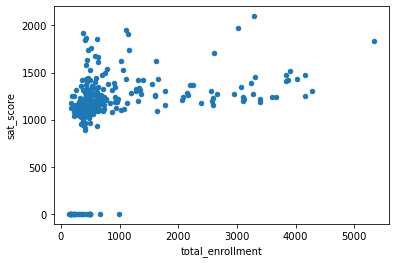

In [77]:
combined.plot.scatter("total_enrollment", "sat_score")
plt.show()

In [78]:
low_enrollment = combined[(combined["total_enrollment"] < 1000) & (combined["sat_score"] < 1000) ]

In [79]:
low_enrollment["SCHOOL NAME"].value_counts().head(10)

THE URBAN ASSEMBLY SCHOOL FOR GREEN CAREERS            1
BRONX EARLY COLLEGE ACADEMY FOR TEACHING & LEARNING    1
BRONX CAREER AND COLLEGE PREPARATORY HIGH SCHOOL       1
YORK EARLY COLLEGE ACADEMY                             1
PAN AMERICAN INTERNATIONAL HIGH SCHOOL                 1
INTERNATIONAL HIGH SCHOOL AT PROSPECT HEIGHTS          1
INTERNATIONAL COMMUNITY HIGH SCHOOL                    1
KINGSBRIDGE INTERNATIONAL HIGH SCHOOL                  1
HUDSON HIGH SCHOOL OF LEARNING TECHNOLOGIES            1
BUSINESS OF SPORTS SCHOOL                              1
Name: SCHOOL NAME, dtype: int64

In [80]:
low_enrollment["School Name"].value_counts().head(10)

0                                        29
KINGSBRIDGE INTERNATIONAL HIGH SCHOOL     1
INTERNATIONAL SCHOOL FOR LIBERAL ARTS     1
BRONX INTERNATIONAL HIGH SCHOOL           1
BROOKLYN INTERNATIONAL HIGH SCHOOL        1
MULTICULTURAL HIGH SCHOOL                 1
FOUNDATIONS ACADEMY                       1
INTERNATIONAL COMMUNITY HIGH SCHOOL       1
PAN AMERICAN INTERNATIONAL HIGH SCHOO     1
INTERNATIONAL HIGH SCHOOL AT PROSPECT     1
Name: School Name, dtype: int64

In [81]:
low_enrollment["School Name"].value_counts()

0                                        29
KINGSBRIDGE INTERNATIONAL HIGH SCHOOL     1
INTERNATIONAL SCHOOL FOR LIBERAL ARTS     1
BRONX INTERNATIONAL HIGH SCHOOL           1
BROOKLYN INTERNATIONAL HIGH SCHOOL        1
MULTICULTURAL HIGH SCHOOL                 1
FOUNDATIONS ACADEMY                       1
INTERNATIONAL COMMUNITY HIGH SCHOOL       1
PAN AMERICAN INTERNATIONAL HIGH SCHOO     1
INTERNATIONAL HIGH SCHOOL AT PROSPECT     1
IT TAKES A VILLAGE ACADEMY                1
HIGH SCHOOL OF WORLD CULTURES             1
Name: School Name, dtype: int64

In [82]:
combined["lat"] = pd.to_numeric(combined["lat"], errors = "coerce")

In [83]:
combined["lon"] = pd.to_numeric(combined["lon"], errors = "coerce")

In [84]:
from mpl_toolkits.basemap import Basemap

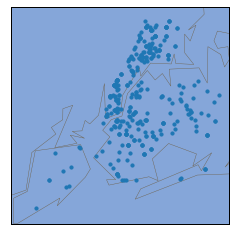

In [85]:
m = Basemap(projection = "merc", llcrnrlat = 40.496044, urcrnrlat = 40.915256, 
            llcrnrlon = -74.255735 ,urcrnrlon = -73.700272, resolution = "i")
lat = combined["lat"].tolist()
lon = combined["lon"].tolist()
# x, y = m(lat, lon)
m.drawmapboundary(fill_color = "#85a6d9")
m.drawcoastlines(color = "#6d5f47", linewidth = .4)
m.drawrivers(color = "#6d5f47",linewidth = .4)
m.scatter(lon,lat, s = 10, latlon = True, zorder = 2)

plt.show()

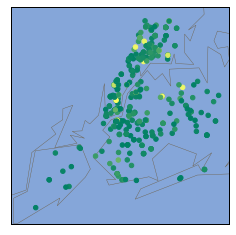

In [86]:
m = Basemap(projection = "merc", llcrnrlat = 40.496044, urcrnrlat = 40.915256, 
            llcrnrlon = -74.255735 ,urcrnrlon = -73.700272, resolution = "i")
lat = combined["lat"].tolist()
lon = combined["lon"].tolist()
# x, y = m(lat, lon)
m.drawmapboundary(fill_color = "#85a6d9")
m.drawcoastlines(color = "#6d5f47", linewidth = .4)
m.drawrivers(color = "#6d5f47",linewidth = .4)
m.scatter(lon,lat, s = 20, latlon = True, zorder = 2, c = combined["ell_percent"], cmap = "summer")

plt.show()

In [87]:
combined[["ell_percent", "SCHOOL NAME"]]

,ell_percent,SCHOOL NAME
0,22.3,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES
1,21.1,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL
2,5.0,EAST SIDE COMMUNITY SCHOOL
3,11.2,MARTA VALLE HIGH SCHOOL
4,0.2,"NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND MATH HIGH SCHOOL"
5,0.2,BARD HIGH SCHOOL EARLY COLLEGE
6,8.0,47 THE AMERICAN SIGN LANGUAGE AND ENGLISH SECONDARY SCHOOL
7,2.1,FOOD AND FINANCE HIGH SCHOOL
8,3.8,ESSEX STREET ACADEMY
9,9.5,HIGH SCHOOL OF HOSPITALITY MANAGEMENT


In [88]:
district = combined.groupby("school_dist").agg("mean").reset_index()

In [89]:
district

,school_dist,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5,Total Cohort,Total Grads - % of cohort,...,eng_t_11,aca_t_11,saf_s_11,com_s_11,eng_s_11,aca_s_11,saf_tot_11,com_tot_11,eng_tot_11,aca_tot_11
0,01,441.833333,473.333333,439.333333,1354.500000,116.681090,173.019231,135.800000,93.500000,71.333333,...,6.700000,7.500000,6.768611,6.165787,6.736713,7.446898,7.433333,6.816667,7.116667,7.683333
1,02,426.619092,444.186256,424.832836,1142.708333,128.908454,201.516827,157.495833,158.647849,75.453574,...,7.120833,7.564583,6.910660,6.204057,6.650422,7.385029,7.520833,6.720833,7.037500,7.541667
2,03,428.529851,437.997512,426.915672,987.583333,156.183494,244.522436,193.087500,183.384409,74.029937,...,6.533333,6.991667,6.716667,6.258333,6.633333,7.375000,7.233333,6.616667,6.891667,7.391667
3,04,402.142857,416.285714,405.714286,1224.142857,129.016484,183.879121,151.035714,113.857143,76.257143,...,7.428571,7.885714,6.885714,6.114286,6.685714,7.571429,7.714286,6.942857,7.185714,7.785714
4,05,427.159915,438.236674,419.666098,1110.285714,85.722527,115.725275,142.464286,143.677419,75.200881,...,6.242857,6.957143,6.314286,6.000000,6.428571,7.285714,7.085714,6.414286,6.671429,7.314286
5,06,382.011940,400.565672,382.066269,1042.300000,108.711538,159.715385,105.425000,180.848387,69.811233,...,7.060000,7.660000,6.950000,6.150000,6.700000,7.510000,7.660000,6.920000,7.170000,7.760000
6,07,376.461538,380.461538,371.923077,1128.846154,73.703402,112.476331,105.276923,105.605459,67.146628,...,6.784615,7.284615,6.800000,6.184615,6.646154,7.453846,7.392308,6.746154,7.007692,7.553846
7,08,386.214383,395.542741,377.908005,826.000000,118.379371,168.020979,144.731818,215.510264,59.514477,...,6.781818,7.390909,6.364697,5.954066,6.401843,7.143763,7.218182,6.645455,6.863636,7.409091
8,09,373.755970,383.582836,374.633134,1070.800000,71.411538,104.265385,98.470000,113.330645,67.607962,...,6.905000,7.355000,6.655000,6.145000,6.705000,7.490000,7.365000,6.795000,7.110000,7.665000
9,10,403.363636,418.000000,400.863636,1222.227273,132.231206,226.914336,191.618182,161.318182,68.656958,...,6.700000,7.309091,6.577273,6.040909,6.654545,7.409091,7.268182,6.645455,6.986364,7.536364


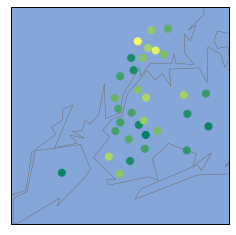

In [90]:
m = Basemap(projection = "merc", llcrnrlat = 40.496044, urcrnrlat = 40.915256, 
            llcrnrlon = -74.255735 ,urcrnrlon = -73.700272, resolution = "i")
lat = district["lat"].tolist()
lon = district["lon"].tolist()
# x, y = m(lat, lon)
m.drawmapboundary(fill_color = "#85a6d9")
m.drawcoastlines(color = "#6d5f47", linewidth = .4)
m.drawrivers(color = "#6d5f47",linewidth = .4)
m.scatter(lon,lat, s = 50, latlon = True, zorder = 2, c = district["ell_percent"], cmap = "summer")

plt.show()

In [91]:
district[["school_dist", "ell_percent"]]

,school_dist,ell_percent
0,01,10.000000
1,02,13.006250
2,03,9.025000
3,04,4.557143
4,05,4.157143
5,06,30.040000
6,07,16.661538
7,08,15.790909
8,09,19.945000
9,10,18.177273


In [92]:
survey_fields

['DBN',
 'rr_s',
 'rr_t',
 'rr_p',
 'N_s',
 'N_t',
 'N_p',
 'saf_p_11',
 'com_p_11',
 'eng_p_11',
 'aca_p_11',
 'saf_t_11',
 'com_t_11',
 'eng_t_11',
 'aca_t_11',
 'saf_s_11',
 'com_s_11',
 'eng_s_11',
 'aca_s_11',
 'saf_tot_11',
 'com_tot_11',
 'eng_tot_11',
 'aca_tot_11']

In [93]:
survey_fields.remove("DBN")

In [94]:
combined.corr()["sat_score"][survey_fields]

rr_s          0.073800
rr_t         -0.102633
rr_p         -0.048947
N_s           0.347000
N_t           0.294385
N_p           0.334171
saf_p_11     -0.000165
com_p_11     -0.120304
eng_p_11     -0.000323
aca_p_11     -0.005153
saf_t_11      0.157688
com_t_11      0.004766
eng_t_11     -0.038643
aca_t_11      0.014868
saf_s_11      0.107336
com_s_11     -0.076879
eng_s_11      0.017488
aca_s_11      0.111054
saf_tot_11    0.119855
com_tot_11   -0.060478
eng_tot_11   -0.024619
aca_tot_11    0.037769
Name: sat_score, dtype: float64

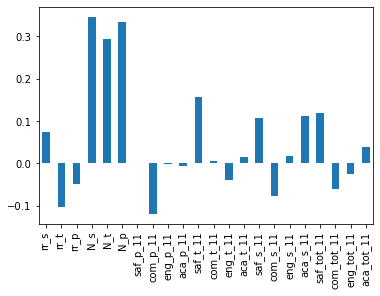

In [95]:
combined.corr()["sat_score"][survey_fields].plot.bar()
plt.show()

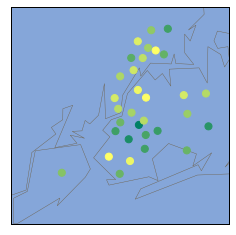

In [96]:
m = Basemap(projection = "merc", llcrnrlat = 40.496044, urcrnrlat = 40.915256, 
            llcrnrlon = -74.255735 ,urcrnrlon = -73.700272, resolution = "i")
lat = district["lat"].tolist()
lon = district["lon"].tolist()
# x, y = m(lat, lon)
m.drawmapboundary(fill_color = "#85a6d9")
m.drawcoastlines(color = "#6d5f47", linewidth = .4)
m.drawrivers(color = "#6d5f47",linewidth = .4)
m.scatter(lon,lat, s = 50, latlon = True, zorder = 2, c = district["saf_s_11"], cmap = "summer")

plt.show()

In [97]:

print(combined.columns[combined.columns.str.contains("_per")])

Index(['fl_percent', 'frl_percent', 'ell_percent', 'sped_percent', 'asian_per',
       'black_per', 'hispanic_per', 'white_per', 'male_per', 'female_per'],
      dtype='object')


In [98]:
race = ['white_per','asian_per','black_per', 'hispanic_per' ]

combined.corr()["sat_score"][race]

white_per       0.302345
asian_per       0.256366
black_per      -0.085260
hispanic_per   -0.233828
Name: sat_score, dtype: float64

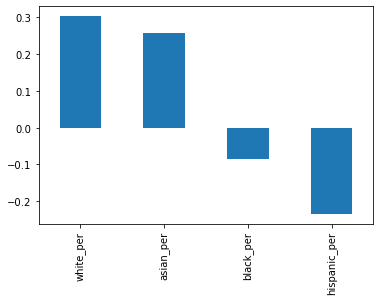

In [99]:
combined.corr()["sat_score"][race].plot.bar()

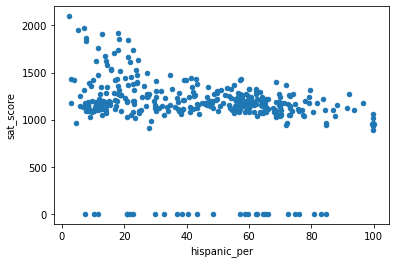

In [100]:
combined.plot.scatter("hispanic_per","sat_score", )

In [101]:
combined.loc[combined["hispanic_per"] > 95, "SCHOOL NAME"]

44                                MANHATTAN BRIDGES HIGH SCHOOL
82             WASHINGTON HEIGHTS EXPEDITIONARY LEARNING SCHOOL
89     GREGORIO LUPERON HIGH SCHOOL FOR SCIENCE AND MATHEMATICS
125                         ACADEMY FOR LANGUAGE AND TECHNOLOGY
141                       INTERNATIONAL SCHOOL FOR LIBERAL ARTS
176            PAN AMERICAN INTERNATIONAL HIGH SCHOOL AT MONROE
253                                   MULTICULTURAL HIGH SCHOOL
286                      PAN AMERICAN INTERNATIONAL HIGH SCHOOL
Name: SCHOOL NAME, dtype: object

In [102]:
combined.loc[(combined["hispanic_per"] < 10 )& (combined["sat_score"] > 1800) , "SCHOOL NAME"]

37                                  STUYVESANT HIGH SCHOOL
151                           BRONX HIGH SCHOOL OF SCIENCE
187                         BROOKLYN TECHNICAL HIGH SCHOOL
327    QUEENS HIGH SCHOOL FOR THE SCIENCES AT YORK COLLEGE
356                    STATEN ISLAND TECHNICAL HIGH SCHOOL
Name: SCHOOL NAME, dtype: object

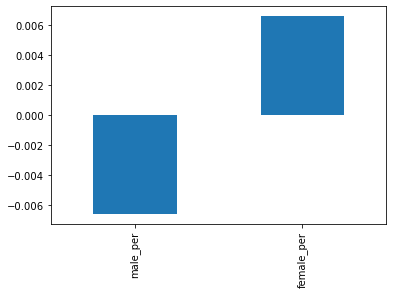

In [103]:
combined.corr()["sat_score"][['male_per', 'female_per']].plot.bar()

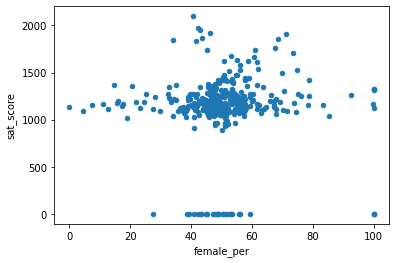

In [104]:
combined.plot.scatter('female_per',"sat_score")

In [105]:
combined[(combined["female_per"]>60) & (combined["sat_score"]>1700)]["SCHOOL NAME"]

5                                            BARD HIGH SCHOOL EARLY COLLEGE
26                                            ELEANOR ROOSEVELT HIGH SCHOOL
60                                                       BEACON HIGH SCHOOL
61     FIORELLO H. LAGUARDIA HIGH SCHOOL OF MUSIC & ART AND PERFORMING ARTS
302                                             TOWNSEND HARRIS HIGH SCHOOL
Name: SCHOOL NAME, dtype: object